In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sb

# P2: Hand Analyse

In [7]:
P2_hands_dist = pd.read_table("C:/Users/sarah/Desktop/W2023 MoCap Data/Motioncapture_tsv_files/P2_dist_traveled/conv_P2&1_e_P2_hands_Distance.tsv", delimiter="\t", header = 0)
P2_hands_dir_dist = pd.read_table("C:/Users/sarah/Desktop/W2023 MoCap Data/Motioncapture_tsv_files/P2_dist_traveled/conv_P2&1_e_P2_hands_comp_Distance.tsv", delimiter="\t", header = 0)
P2_hands_dir_dist.rename(columns={'P2_hands_comp_Distance_X':'x-direction', 'P2_hands_comp_Distance_Y':'y-direction', 'P2_hands_comp_Distance_Z':'z-direction'}, inplace=True)
P2_hands_pos = pd.read_table("C:/Users/sarah/Desktop/W2023 MoCap Data/Motioncapture_tsv_files/P2_dist_traveled/conv_P2&1_e_P2_hands_pos.tsv", delimiter="\t", header = 0)
P2_hands_pos.rename(columns={"P2_hand_lP2_hands_pos_X":"Left_X", "P2_hand_lP2_hands_pos_Y":"Left_Y", "P2_hand_lP2_hands_pos_Z":"Left_Z", "P2_hand_rP2_hands_pos_X":"Right_X", "P2_hand_rP2_hands_pos_Y":"Right_Y", "P2_hand_rP2_hands_pos_Z":"Right_Z"}, inplace=True)

Man könnte sich anschauen, wo die Spitzenwerte liegen, und dort dann analysieren, in welche Richtung sich die Hände bewegen. 

In [8]:
P2_hands_dist_sorted = P2_hands_dist.sort_values(by='P2_hands_Distance', ascending=False)
P2_hands_highest_values = P2_hands_dist_sorted.iloc[:100]

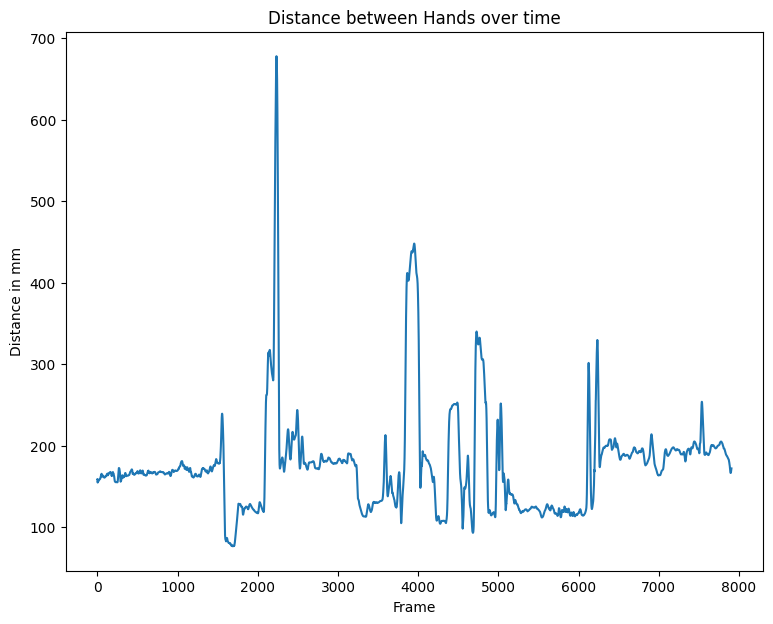

In [9]:
plt.figure(figsize = (9, 7))
plt.title('Distance between Hands over time')
plt.xlabel('Frame')
plt.ylabel('Distance in mm')
#plt.axhline(y = 225, color = 'r', linestyle = '-')
plt.plot(P2_hands_dist)

In [10]:
import scipy
from scipy import stats

In [11]:
P2_mode = sum((P2_hands_dist.mode(numeric_only=True)).values.tolist(), [])
P2_mean = [np.mean(P2_hands_dist).tolist()]
P2_max = [np.max(P2_hands_dist).tolist()]
P2_min = [np.min(P2_hands_dist).tolist()]
P2_median = [np.median(P2_hands_dist).tolist()]
P2_harmonic_mean = (scipy.stats.hmean(P2_hands_dist)).tolist()
print(P2_mode, P2_mean, P2_max, P2_min, P2_harmonic_mean)

[195.605] [176.2357948653092] [677.796] [76.605] [160.54406997187147]


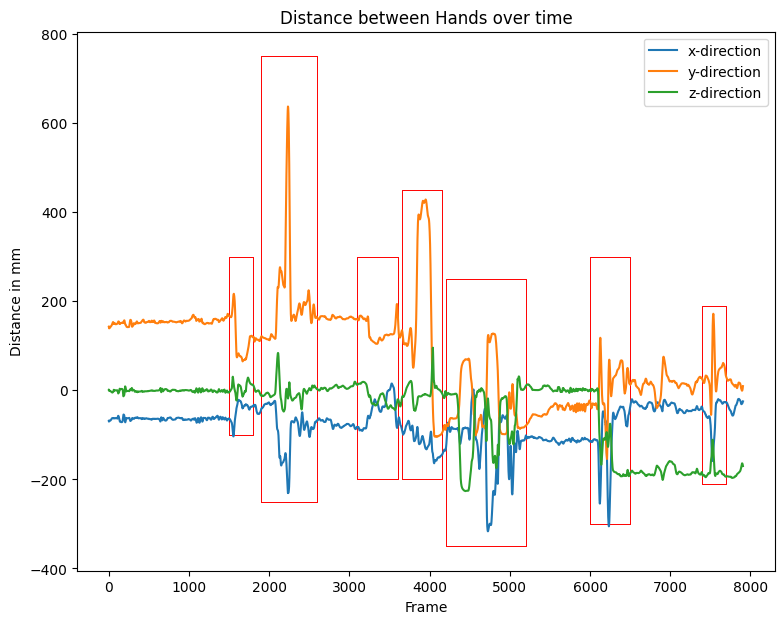

In [12]:
plt.figure(figsize = (9, 7))
for col in ["x-direction", "y-direction","z-direction"]: 
    plt.plot(P2_hands_dir_dist.index, P2_hands_dir_dist[col], label=f"{col}")
    plt.title('Distance between Hands over time')
    plt.xlabel('Frame')
    plt.ylabel('Distance in mm')
    plt.legend()
    plt.gca().add_patch(Rectangle((1500, -100), 300, 400,
             edgecolor = 'red',
             fill=False, 
             lw = 0.5))
    plt.gca().add_patch(Rectangle((1900, -250), 700, 1000,
             edgecolor = 'red',
             fill=False, 
             lw = 0.5))
    plt.gca().add_patch(Rectangle((3100, -200), 500, 500,
             edgecolor = 'red',
             fill=False, 
             lw = 0.5))
    plt.gca().add_patch(Rectangle((3650, -200), 500, 650,
             edgecolor = 'red',
             fill=False, 
             lw = 0.5))
    plt.gca().add_patch(Rectangle((4200, -350), 1000, 600,
             edgecolor = 'red',
             fill=False, 
             lw = 0.5))
    plt.gca().add_patch(Rectangle((6000, -300), 500, 600,
             edgecolor = 'red',
             fill=False, 
             lw = 0.5))
    plt.gca().add_patch(Rectangle((7400, -210), 300, 400,
             edgecolor = 'red',
             fill=False, 
             lw = 0.5))
    plt.savefig('P2_hands_movement')

Patterns:
1. y goes up, z goes up more or less synchroneously, x goes down -> Hände hoch (Brusthöhe), zsmgeklappt, rechts u. links hin und her
2. y goes up, x goes down in the opposite way, but not as far, and z wiggles a bit in y-direction -> beide Hände synchron erst nach links, dann nach rechts, leicht auseinander und wieder zsm
3. whenever y goes up, x goes down, and z does the same -> rechts u. links hin und her
4. same here -> Arme gehen auseinander, wieder zsm 
5. this time z & x both go down the opposite way as y goes up -> zwschd. Hände abgelegt, dann RH zum Kopf (Ausschlag Z) dann, wieder auf den Tisch; RH gestikuliert nach rechts auf B-Höhe; dann Hände wieder abgelegt, wieder hoch
6. same here -> RH gestikuliert nach r, dann l, RH schwenkt nach vorne r
7. x goes down, y goes up, z goes up as well -> RH schwenkt hoch nach r 

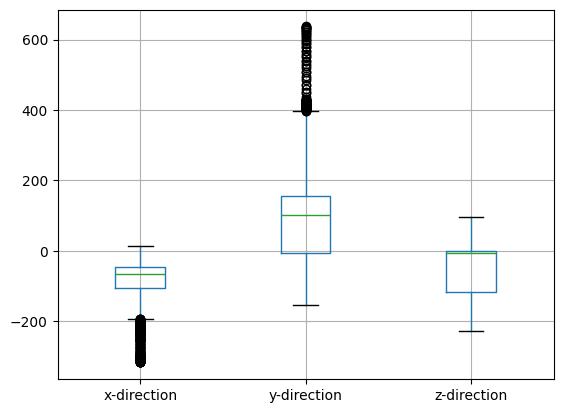

In [13]:
P2_dir_Boxplot = P2_hands_dir_dist.boxplot(column=["x-direction", "y-direction","z-direction"])

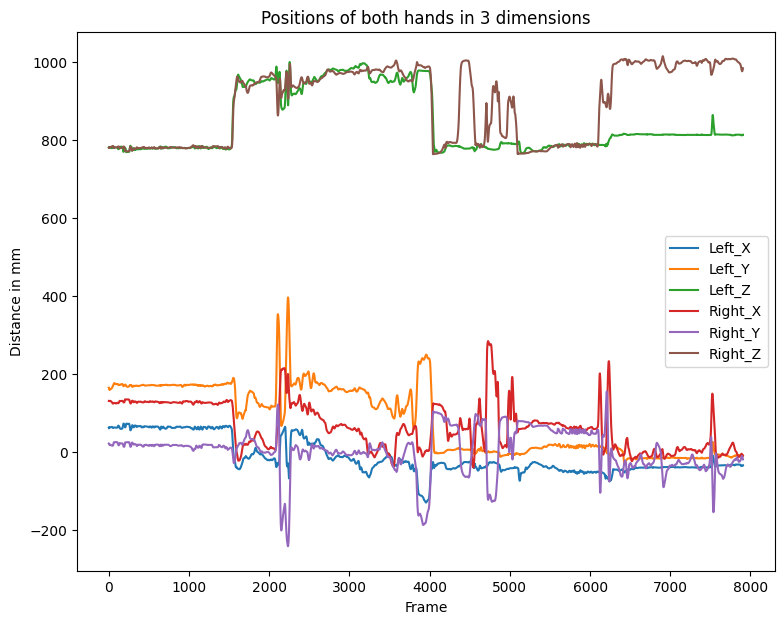

In [14]:
plt.figure(figsize = (9, 7))
for col in ["Left_X", "Left_Y", "Left_Z","Right_X","Right_Y","Right_Z"]: 
    plt.plot(P2_hands_pos.index, P2_hands_pos[col], label=f"{col}")
    plt.title('Positions of both hands in 3 dimensions')
    plt.xlabel('Frame')
    plt.ylabel('Distance in mm')
    plt.legend()
    plt.savefig('P2_hands_pos')

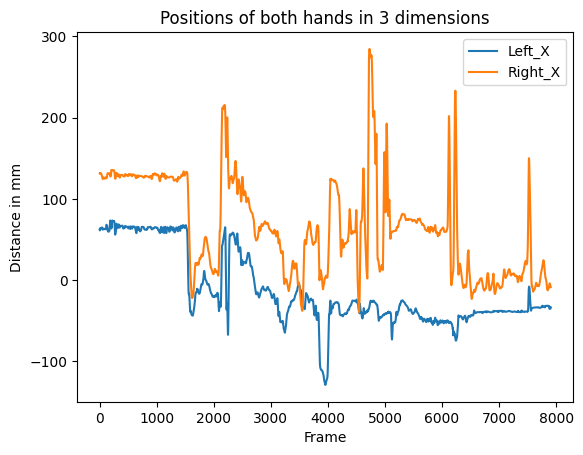

In [15]:
for col in ["Left_X", "Right_X"]: 
    plt.plot(P2_hands_pos.index, P2_hands_pos[col], label=f"{col}")
    plt.title('Positions of both hands in 3 dimensions')
    plt.xlabel('Frame')
    plt.ylabel('Distance in mm')
    plt.legend()

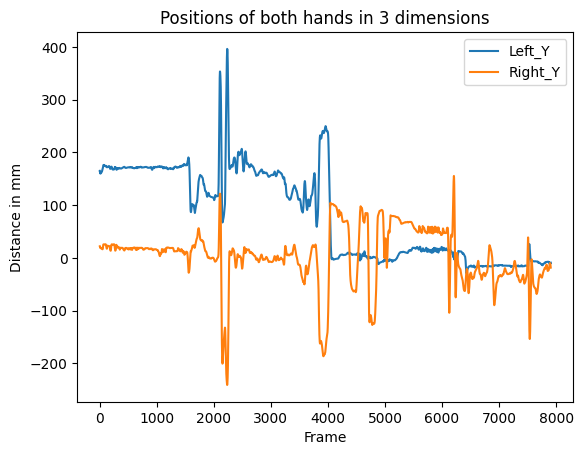

In [16]:
for col in ["Left_Y", "Right_Y"]: 
    plt.plot(P2_hands_pos.index, P2_hands_pos[col], label=f"{col}")
    plt.title('Positions of both hands in 3 dimensions')
    plt.xlabel('Frame')
    plt.ylabel('Distance in mm')
    plt.legend()

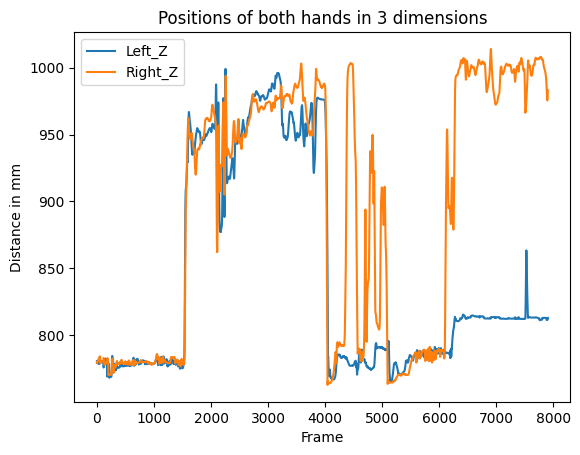

In [17]:
for col in ["Left_Z","Right_Z"]: 
    plt.plot(P2_hands_pos.index, P2_hands_pos[col], label=f"{col}")
    plt.title('Positions of both hands in 3 dimensions')
    plt.xlabel('Frame')
    plt.ylabel('Distance in mm')
    plt.legend()

Gestikulieren in die -x Richtung heißt, dass sich die Hand 'eher' zur Körpermitte bewegt; + x ist eher weg
Gestikilieren in die -y Richtung heißt, dass sich die Hände 'eher' nach links bewegen 

# P6: Hand Analyse

In [18]:
P6_hands_dist = pd.read_table("C:/Users/sarah/Desktop/W2023 MoCap Data/Motioncapture_tsv_files/P6_dist_traveled/conv_P6&5_e_P6_hands_Distance.tsv", delimiter="\t", header = 0)

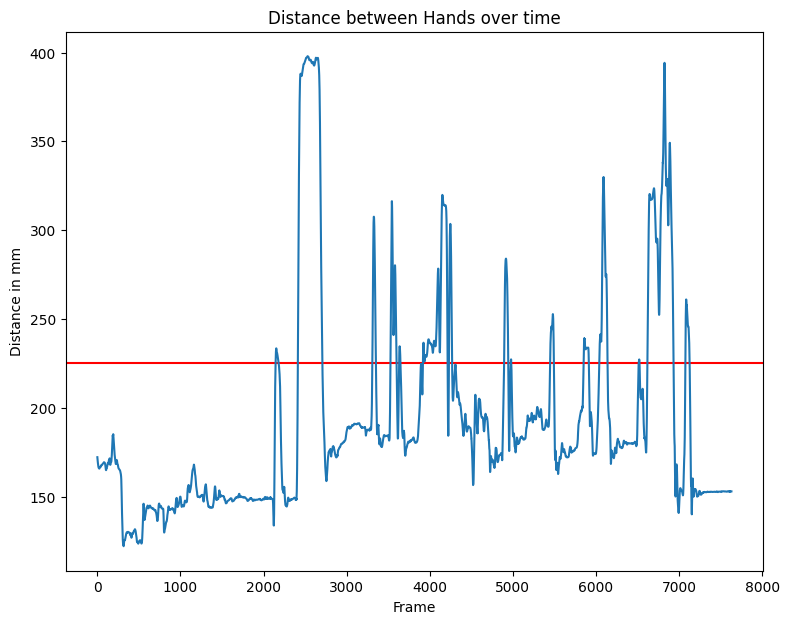

In [19]:
plt.figure(figsize = (9, 7))
plt.title('Distance between Hands over time')
plt.xlabel('Frame')
plt.ylabel('Distance in mm')
plt.axhline(y = 225, color = 'r', linestyle = '-')
plt.plot(P6_hands_dist)

What happens, when the distance between hands gets bigger, and then smaller? 
What 'type' of movement is that? 

{'whiskers': [<matplotlib.lines.Line2D at 0x23d48aa5e20>,
 'caps': [<matplotlib.lines.Line2D at 0x23d48aa6390>,
 'boxes': [<matplotlib.lines.Line2D at 0x23d48aa5c70>],
 'medians': [<matplotlib.lines.Line2D at 0x23d48aa6960>],
 'fliers': [<matplotlib.lines.Line2D at 0x23d48aa6c60>],
 'means': []}

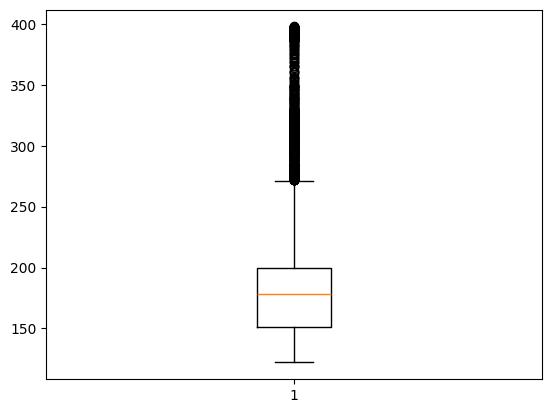

In [20]:
plt.boxplot(P6_hands_dist)

As we can see (also from the graph above) the function has a lot of extreme values, which makes calculation of mean kind of unneccessary.

In [21]:
P6_mode = sum((P6_hands_dist.mode(numeric_only=True)).values.tolist(), [])
P6_mean = [np.mean(P6_hands_dist).tolist()]
P6_max = [np.max(P6_hands_dist).tolist()]
P6_min = [np.min(P6_hands_dist).tolist()]
P6_median = [np.median(P6_hands_dist).tolist()]
P6_harmonic_mean = (scipy.stats.hmean(P6_hands_dist)).tolist()
print(f"The mode is {P6_mode} mm ")

print(f"The maximum distance is {P6_max} mm, the minimum distance is {P6_min} mm")

The mode is [152.761] mm 
The maximum distance is [397.91] mm, the minimum distance is [122.083] mm


In [22]:
P6_hands_dist_dir = pd.read_table("C:/Users/sarah/Desktop/W2023 MoCap Data/Motioncapture_tsv_files/P6_dist_traveled/conv_P6&5_e_P6_hands_dir_Distance.tsv", delimiter="\t", header = 0)

In [23]:
P6_hands_dist_dir.rename(columns={'P6_hands_dir_Distance_X':'x-direction', 'P6_hands_dir_Distance_Y':'y-direction', 'P6_hands_dir_Distance_Z':'z-direction'}, inplace=True)

In [24]:
P6_hands_dist_dir

,x-direction,y-direction,z-direction
0,-41.135,166.630,-13.973
1,-40.847,166.296,-13.663
2,-40.651,166.078,-13.435
3,-40.168,165.147,-13.155
4,-40.197,164.788,-13.155
...,...,...,...
7627,-39.792,147.659,-3.089
7628,-39.790,147.668,-3.059
7629,-39.785,147.668,-3.048
7630,-39.791,147.673,-3.032


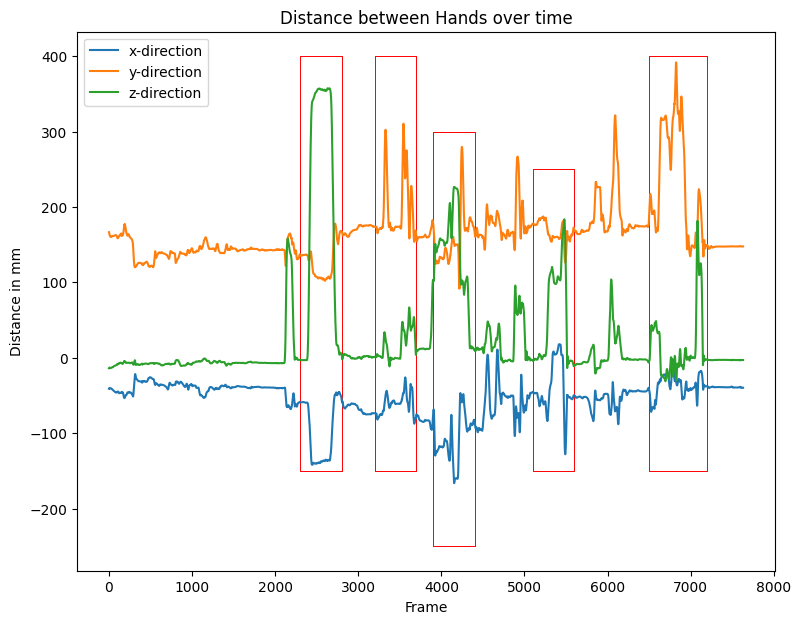

In [25]:
plt.figure(figsize = (9, 7))
for col in ["x-direction", "y-direction","z-direction"]: 
    plt.plot(P6_hands_dist_dir.index, P6_hands_dist_dir[col], label=f"{col}")
    plt.title('Distance between Hands over time')
    plt.xlabel('Frame')
    plt.ylabel('Distance in mm')
    plt.legend()
    plt.gca().add_patch(Rectangle((2300, -150), 500, 550,
             edgecolor = 'red',
             fill=False, 
             lw = 0.5))
    plt.gca().add_patch(Rectangle((6500, -150), 700, 550,
             edgecolor = 'red',
             fill=False, 
             lw = 0.5))
    plt.gca().add_patch(Rectangle((3200, -150), 500, 550,
             edgecolor = 'red',
             fill=False, 
             lw = 0.5))
    plt.gca().add_patch(Rectangle((3900, -250), 500, 550,
             edgecolor = 'red',
             fill=False, 
             lw = 0.5))
    plt.gca().add_patch(Rectangle((5100, -150), 500, 400,
             edgecolor = 'red',
             fill=False, 
             lw = 0.5))
    plt.savefig('P6_hands_movement')

Patterns: 

1. z goes up, x & y go down -> Kurve davor: LH wird zum Kopf gehoben, legt ab, ab 2700 gehen beide Hände synchron leicht hoch und senken sich wieder ab 
2. all go up - in different heights -> 3300: beide Hände wischen synchron nach außen (angehoben), senknen sich nach innen ab, ab 3500 heben sich wieder nach außen, beide Hände machen eine kreisende Bwg. in der Luft
3. z & x go up, y stays the same -> ab 3800: LH wird angehoben, macht leichten Halbkreis nach außen; 4200: RH kommt dazu, dann werden sie wieder abgelegt; 4600: beide heben und senken sich wieder, 4700 dasselbe Spiel, aber leicht nach vorne (+x); 4800: beide Hände öffene sich nach außen und vorne, LH weiter oben, wieder nach innen abgelegt
4. y & x go up, z goes down -> 5300: LH hebt sich nach vorne leicht zur Mitte, hebt sich noch ein Stück mehr, wird wieder abgelegt. 5800: beide Hände wedeln leicht am Tisch, 6100 öffnen sich nach außen (leicht angehoben), senken wieder ab
5. -x, +y, +y -> ab 6500 heben sich beide Hände leicht auseinander, machen einen synchronen Halbkreis nach außen <->, 2 mal wiederholt, abgelegt; ab 700 hebt sich LH wieder, schwenkt im Halbkreis nach außen

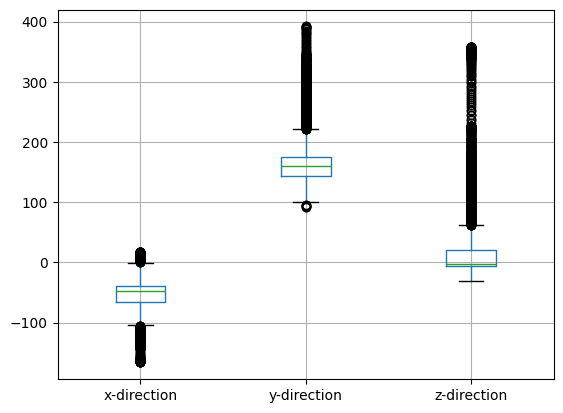

In [26]:
P6_dir_Boxplot = P6_hands_dist_dir.boxplot(column=["x-direction", "y-direction","z-direction"])

In [5]:
P6_hands_pos = pd.read_table("C:/Users/sarah/Desktop/W2023 MoCap Data/Motioncapture_tsv_files/P6_dist_traveled/conv_P6&5_e_P6_hands_pos.tsv", delimiter="\t", header = 0)
P6_hands_pos.rename(columns={"P6_hand_lP1_hands_pos_X":"Left_X", "P6_hand_lP1_hands_pos_Y":"Left_Y", "P6_hand_lP1_hands_pos_Z":"Left_Z", "P6_hand_rP1_hands_pos_X":"Right_X", "P6_hand_rP1_hands_pos_Y":"Right_Y", "P6_hand_rP1_hands_pos_Z":"Right_Z"}, inplace=True)

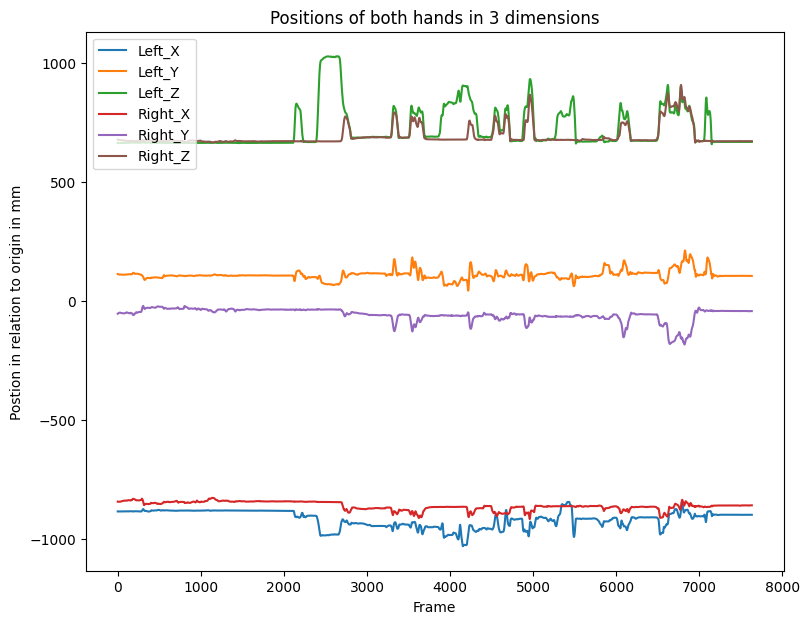

In [9]:
plt.figure(figsize = (9, 7))
for col in ["Left_X", "Left_Y", "Left_Z","Right_X","Right_Y","Right_Z"]: 
    plt.plot(P6_hands_pos.index, P6_hands_pos[col], label=f"{col}")
    plt.title('Positions of both hands in 3 dimensions')
    plt.xlabel('Frame')
    plt.ylabel('Postion in relation to origin in mm')
    plt.legend(loc='upper left')
    plt.savefig('P6_hands_pos')

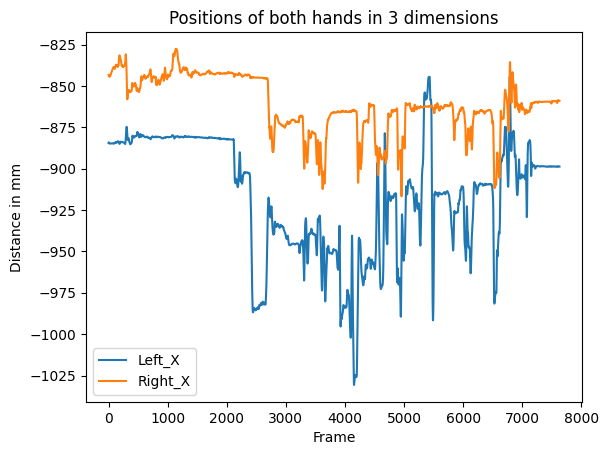

In [29]:
for col in ["Left_X","Right_X"]: 
    plt.plot(P6_hands_pos.index, P6_hands_pos[col], label=f"{col}")
    plt.title('Positions of both hands in 3 dimensions')
    plt.xlabel('Frame')
    plt.ylabel('Distance in mm')
    plt.legend()

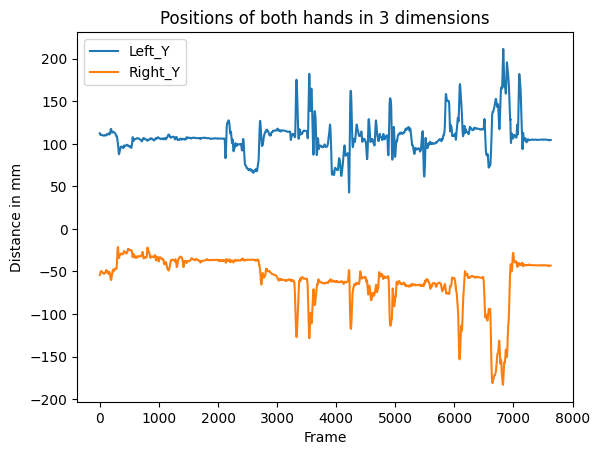

In [30]:
for col in ["Left_Y","Right_Y"]: 
    plt.plot(P6_hands_pos.index, P6_hands_pos[col], label=f"{col}")
    plt.title('Positions of both hands in 3 dimensions')
    plt.xlabel('Frame')
    plt.ylabel('Distance in mm')
    plt.legend()

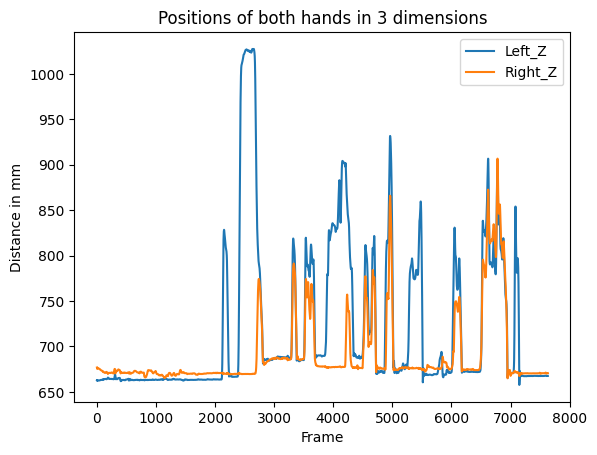

In [31]:
for col in ["Left_Z","Right_Z"]: 
    plt.plot(P6_hands_pos.index, P6_hands_pos[col], label=f"{col}")
    plt.title('Positions of both hands in 3 dimensions')
    plt.xlabel('Frame')
    plt.ylabel('Distance in mm')
    plt.legend()

# P1: Hand Analyse

In [32]:
P1_hands_dist = pd.read_table("C:/Users/sarah/Desktop/W2023 MoCap Data/Motioncapture_tsv_files/P1_dist_traveled/conv_P1&2_edited_P1_hands_Distance.tsv", delimiter="\t", header = 0)
P1_hands_dir_dist = pd.read_table("C:/Users/sarah/Desktop/W2023 MoCap Data/Motioncapture_tsv_files/P1_dist_traveled/conv_P1&2_edited_P1_hands_dir_Distance.tsv", delimiter="\t", header = 0)

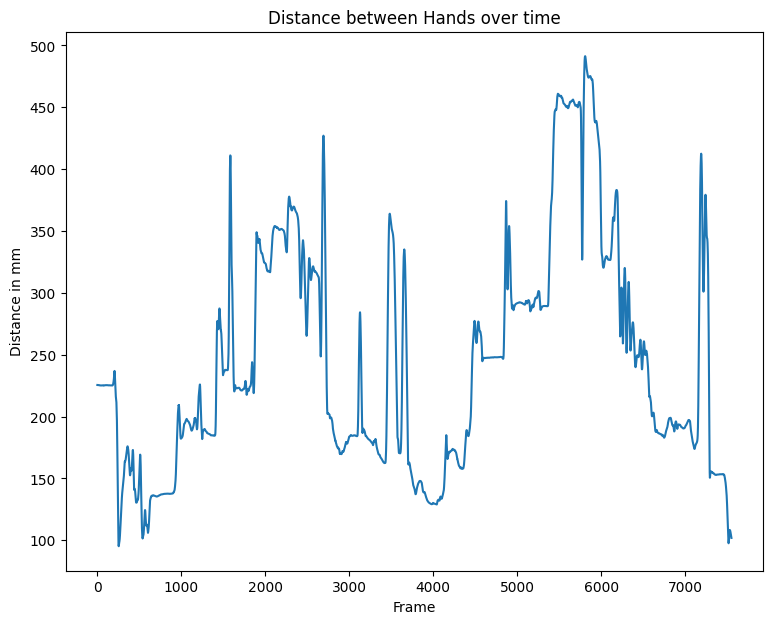

In [33]:
plt.figure(figsize = (9, 7))
plt.title('Distance between Hands over time')
plt.xlabel('Frame')
plt.ylabel('Distance in mm')
#plt.axhline(y = 225, color = 'r', linestyle = '-')
plt.plot(P1_hands_dist)

{'whiskers': [<matplotlib.lines.Line2D at 0x23d48cf5be0>,
 'caps': [<matplotlib.lines.Line2D at 0x23d48cf56a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x23d48cf6360>],
 'medians': [<matplotlib.lines.Line2D at 0x23d48cf5af0>],
 'fliers': [<matplotlib.lines.Line2D at 0x23d48cf6f60>],
 'means': []}

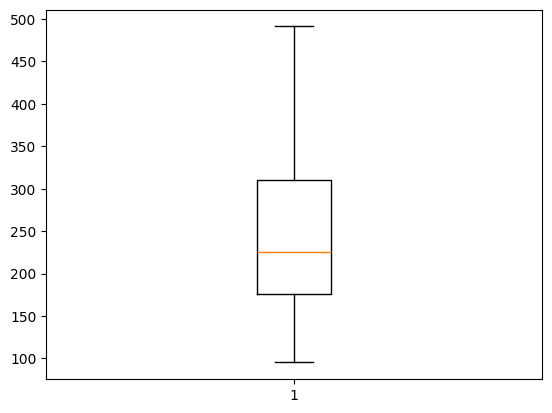

In [34]:
plt.boxplot(P1_hands_dist)

In [35]:
P1_mode = sum((P1_hands_dist.mode(numeric_only=True)).values.tolist(), [])
P1_mean = [np.mean(P1_hands_dist).tolist()]
P1_max = [np.max(P1_hands_dist).tolist()]
P1_min = [np.min(P1_hands_dist).tolist()]
P1_median = [np.median(P1_hands_dist).tolist()]
P1_harmonic_mean = (scipy.stats.hmean(P1_hands_dist)).tolist()
print(f"The mode is {P1_mode} mm ")
print(f"The mean distance is {P1_mean} mm.")
print(f"The maximum distance is {P1_max} mm, the minimum distance is {P1_min} mm")

The mode is [137.687] mm 
The mean distance is [245.3820427588033] mm.
The maximum distance is [491.265] mm, the minimum distance is [95.27] mm


In [36]:
P1_hands_dir_dist.rename(columns={'P1_hands_dir_Distance_X':'x-direction', 'P1_hands_dir_Distance_Y':'y-direction', 'P1_hands_dir_Distance_Z':'z-direction'}, inplace=True)

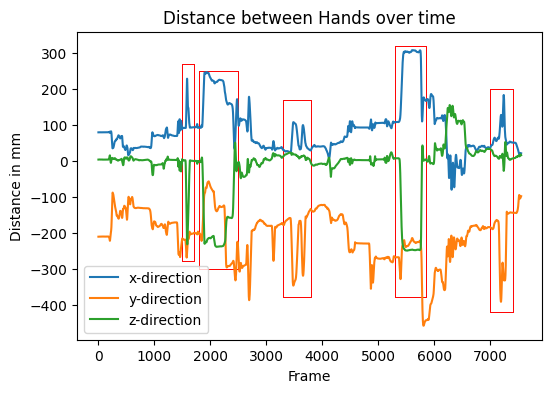

In [37]:
plt.figure(figsize = (6, 4))
for col in ["x-direction", "y-direction","z-direction"]: 
    plt.plot(P1_hands_dir_dist.index, P1_hands_dir_dist[col], label=f"{col}")
    plt.title('Distance between Hands over time')
    plt.xlabel('Frame')
    plt.ylabel('Distance in mm')
    plt.legend()
    plt.gca().add_patch(Rectangle((1500, -280), 200, 550,
             edgecolor = 'red',
             fill=False, 
             lw = 0.5))
    plt.gca().add_patch(Rectangle((1800, -300), 700, 550,
             edgecolor = 'red',
             fill=False, 
             lw = 0.5))
    plt.gca().add_patch(Rectangle((5300, -380), 550, 700,
             edgecolor = 'red',
             fill=False, 
             lw = 0.5))
    plt.gca().add_patch(Rectangle((3300, -380), 500, 550,
             edgecolor = 'red',
             fill=False, 
             lw = 0.5))
    plt.gca().add_patch(Rectangle((7000, -420), 400, 620,
             edgecolor = 'red',
             fill=False, 
             lw = 0.5))
    plt.savefig('P1_hands_movement')

Patterns: 
Grundposition: Hände liegen oben-> d.h. der 'Standard' liegt bereit 'oben in der Luft'
1. x goes up, y & z go down -> davor: Hände liegen am Tisch, wackeln hin und her, bei 1500 wird  HL angehoben & wieder abgelegt 
2. x & y go up, z goes down -> beide Hände liegen am Tisch, Hl geht zum Kinn, und gestikuliert nach vorne und außen, dann geht Hr auch nach oben (ein wenig) und beide Hände gestikulieren nach links und vorne, dann nach rechts (erst -y, dann +y); kurz danach: x geht hoch, y geht runter-> Hände gehen auseinander 
3. x goes up, y goes down, z stays roughly the same -> Hände gehen synchron auseinander und dann wieder zsm
4. x & y go up, z goes down -> Hl geht hoch zum Kopf, dann gehen beide Hände wieder hoch bzw. runter in die Mitte
5. all go up -> auseinander -> beide erst leicht nach links, dann wieder zur Mitte, links, nach rechts

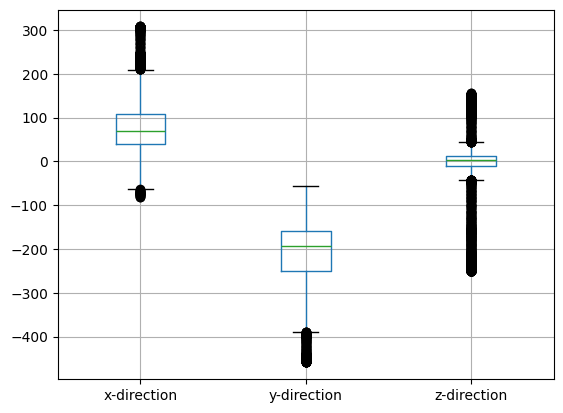

In [38]:
P2_dir_Boxplot = P1_hands_dir_dist.boxplot(column=["x-direction", "y-direction","z-direction"])

In [39]:
P1_hands_pos = pd.read_table("C:/Users/sarah/Desktop/W2023 MoCap Data/Motioncapture_tsv_files/P1_dist_traveled/conv_P1&2_edited_P1_hands_pos.tsv", delimiter="\t", header = 0)
P1_hands_pos.rename(columns={"P1_hand_lP1_hands_pos_X":"Left_X", "P1_hand_lP1_hands_pos_Y":"Left_Y", "P1_hand_lP1_hands_pos_Z":"Left_Z", "P1_hand_rP1_hands_pos_X":"Right_X", "P1_hand_rP1_hands_pos_Y":"Right_Y", "P1_hand_rP1_hands_pos_Z":"Right_Z"}, inplace=True)

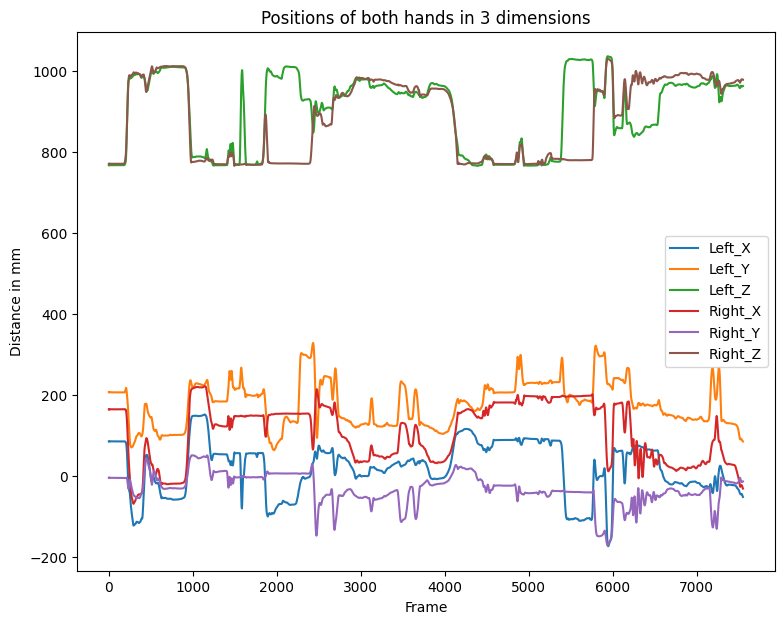

In [40]:
plt.figure(figsize = (9, 7))
for col in ["Left_X", "Left_Y", "Left_Z","Right_X","Right_Y","Right_Z"]: 
    plt.plot(P1_hands_pos.index, P1_hands_pos[col], label=f"{col}")
    plt.title('Positions of both hands in 3 dimensions')
    plt.xlabel('Frame')
    plt.ylabel('Distance in mm')
    plt.legend()
    plt.savefig('P1_hands_pos')

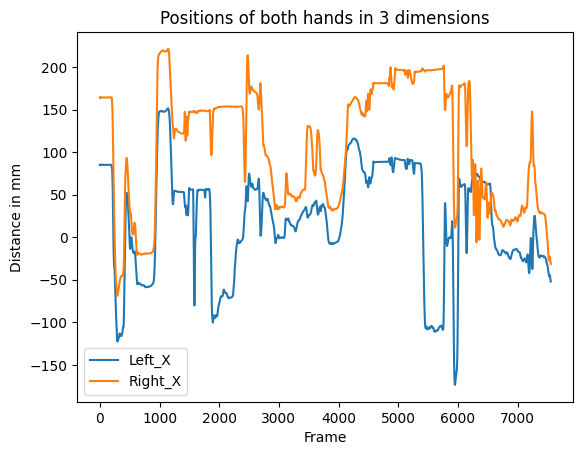

In [41]:
for col in ["Left_X","Right_X"]: 
    plt.plot(P1_hands_pos.index, P1_hands_pos[col], label=f"{col}")
    plt.title('Positions of both hands in 3 dimensions')
    plt.xlabel('Frame')
    plt.ylabel('Distance in mm')
    plt.legend()

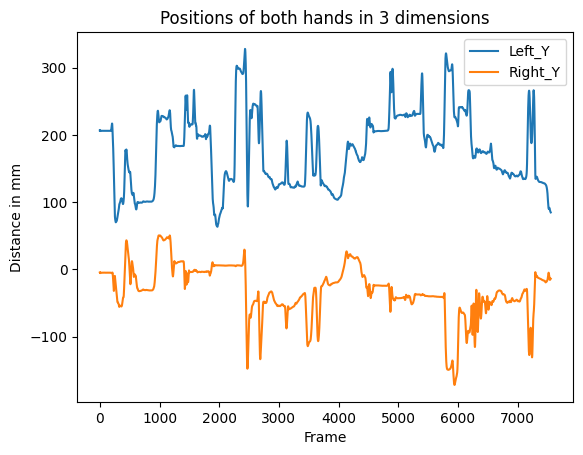

In [42]:
for col in ["Left_Y","Right_Y"]: 
    plt.plot(P1_hands_pos.index, P1_hands_pos[col], label=f"{col}")
    plt.title('Positions of both hands in 3 dimensions')
    plt.xlabel('Frame')
    plt.ylabel('Distance in mm')
    plt.legend()
    

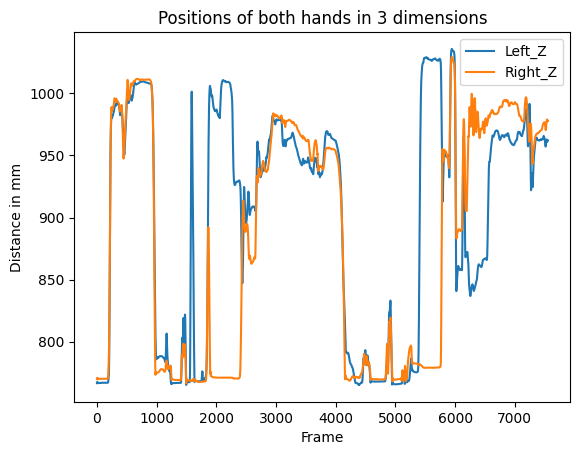

In [43]:
for col in ["Left_Z","Right_Z"]: 
    plt.plot(P1_hands_pos.index, P1_hands_pos[col], label=f"{col}")
    plt.title('Positions of both hands in 3 dimensions')
    plt.xlabel('Frame')
    plt.ylabel('Distance in mm')
    plt.legend()

# P3: Hand Analyse

In [44]:
P3_hands_dist = pd.read_table("C:/Users/sarah/Desktop/W2023 MoCap Data/Motioncapture_tsv_files/P3_dist_traveled/conv_P3&4_e_P3_hands_Distance.tsv", delimiter="\t", header = 0)
P3_hands_dir_dist = pd.read_table("C:/Users/sarah/Desktop/W2023 MoCap Data/Motioncapture_tsv_files/P3_dist_traveled/conv_P3&4_e_P3_hands_dir_Distance.tsv", delimiter="\t", header = 0)

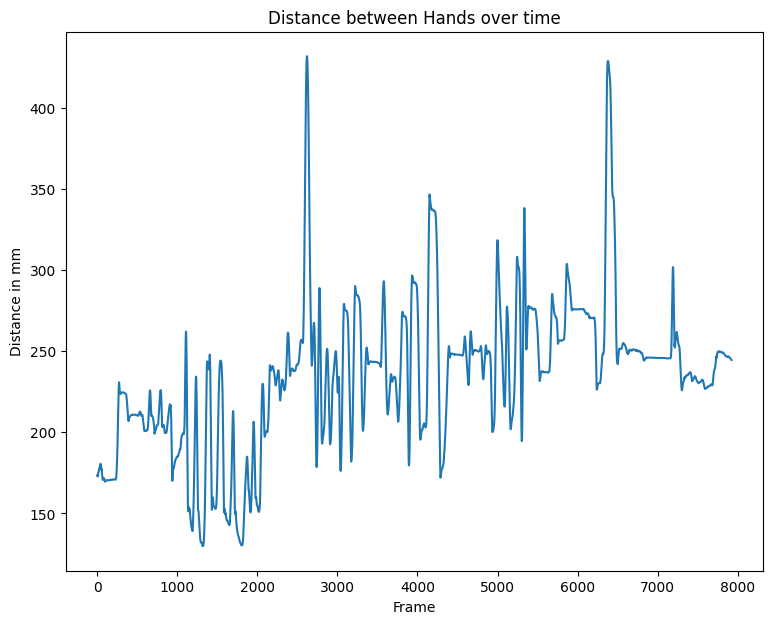

In [45]:
plt.figure(figsize = (9, 7))
plt.title('Distance between Hands over time')
plt.xlabel('Frame')
plt.ylabel('Distance in mm')
#plt.axhline(y = 225, color = 'r', linestyle = '-')
plt.plot(P3_hands_dist)

In [46]:
P3_mode = sum((P3_hands_dist.mode(numeric_only=True)).values.tolist(), [])
P3_mean = [np.mean(P3_hands_dist).tolist()]
P3_max = [np.max(P3_hands_dist).tolist()]
P3_min = [np.min(P3_hands_dist).tolist()]
P3_median = [np.median(P3_hands_dist).tolist()]
P3_harmonic_mean = (scipy.stats.hmean(P3_hands_dist)).tolist()

In [47]:
P3_hands_dir_dist.rename(columns={'P3_hands_dir_Distance_X':'x-direction', 'P3_hands_dir_Distance_Y':'y-direction', 'P3_hands_dir_Distance_Z':'z-direction'}, inplace=True)

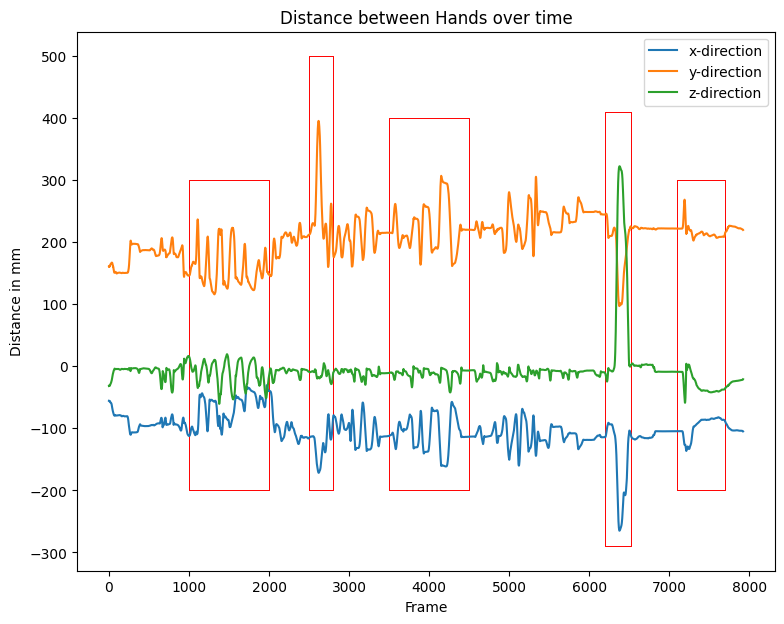

In [48]:
plt.figure(figsize = (9, 7))
for col in ["x-direction", "y-direction","z-direction"]: 
    plt.plot(P3_hands_dir_dist.index, P3_hands_dir_dist[col], label=f"{col}")
    plt.title('Distance between Hands over time')
    plt.xlabel('Frame')
    plt.ylabel('Distance in mm')
    plt.legend()
    plt.gca().add_patch(Rectangle((1000, -200), 1000, 500,
             edgecolor = 'red',
             fill=False, 
             lw = 0.5))
    plt.gca().add_patch(Rectangle((2500, -200), 300, 700,
             edgecolor = 'red',
             fill=False, 
             lw = 0.5))
    plt.gca().add_patch(Rectangle((3500, -200), 1000, 600,
             edgecolor = 'red',
             fill=False, 
             lw = 0.5))
    plt.gca().add_patch(Rectangle((6200, -290), 320, 700,
             edgecolor = 'red',
             fill=False, 
             lw = 0.5))
    plt.gca().add_patch(Rectangle((7100, -200), 600, 500,
             edgecolor = 'red',
             fill=False, 
             lw = 0.5))
    plt.savefig('P3_hands_movement')

Patterns:
1. some kind of "waving" /"wedeln"? x & z haben relativ ähnliche spitzen und höhen, y ist genau umgekehrt -> Hände liegen am Tisch, RH schwenkt leicht nach vorne und rechts, LH bewegt sich am Tisch liegend immer bissl mit in ggs. Richtung
2. y goes up, x goes down, z stays barely the same -> RH wischt nach außen (-X, +Y), dann nach vorne mitte (+X, -y), dann wieder nach außen (-x, +y)
3. wieder dasselbe wedeln wie 1 -> Hände wischen am Tisch liegend 'synchron' nach innen und außen
4. y & x go down, z goes up -> RH geht zum Kopf
5. y goes up, x & z go down

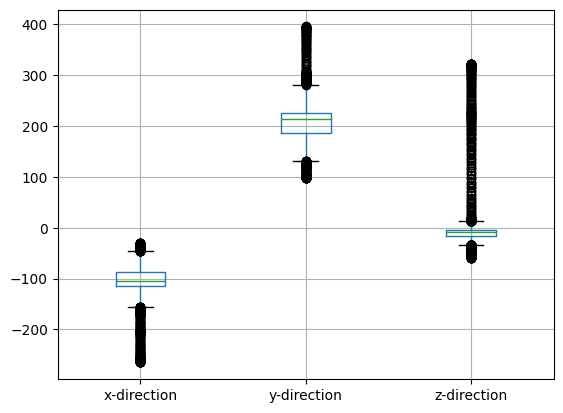

In [49]:
P3_dir_Boxplot = P3_hands_dir_dist.boxplot(column=["x-direction", "y-direction","z-direction"])

In [50]:
P3_hands_pos = pd.read_table("C:/Users/sarah/Desktop/W2023 MoCap Data/Motioncapture_tsv_files/P3_dist_traveled/conv_P3&4_e_P3_hands_pos.tsv", delimiter="\t", header = 0)
P3_hands_pos.rename(columns={"P3_hand_lP3_hands_pos_X":"Left_X", "P3_hand_lP3_hands_pos_Y":"Left_Y", "P3_hand_lP3_hands_pos_Z":"Left_Z", "P3_hand_rP3_hands_pos_X":"Right_X", "P3_hand_rP3_hands_pos_Y":"Right_Y", "P3_hand_rP3_hands_pos_Z":"Right_Z"}, inplace=True)

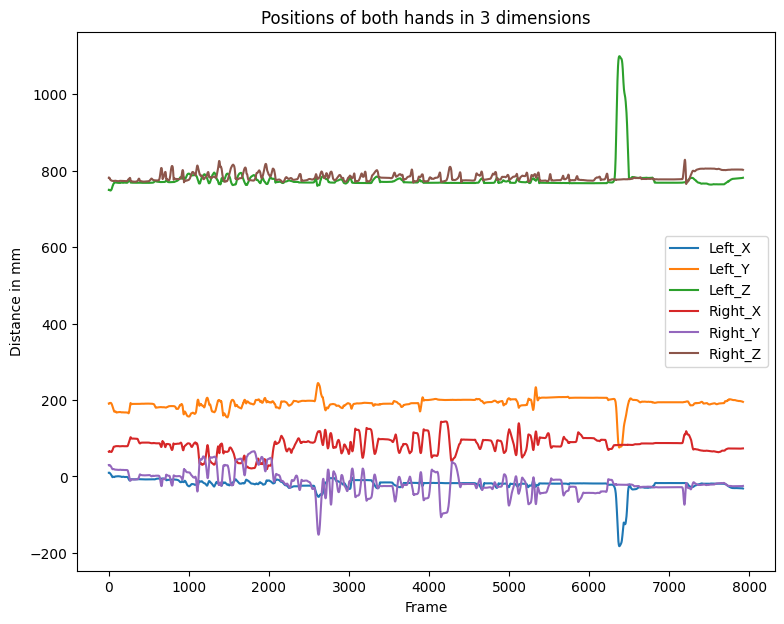

In [51]:
plt.figure(figsize = (9, 7))
for col in ["Left_X", "Left_Y", "Left_Z","Right_X","Right_Y","Right_Z"]: 
    plt.plot(P3_hands_pos.index, P3_hands_pos[col], label=f"{col}")
    plt.title('Positions of both hands in 3 dimensions')
    plt.xlabel('Frame')
    plt.ylabel('Distance in mm')
    plt.legend()
    plt.savefig('P3_hands_pos')

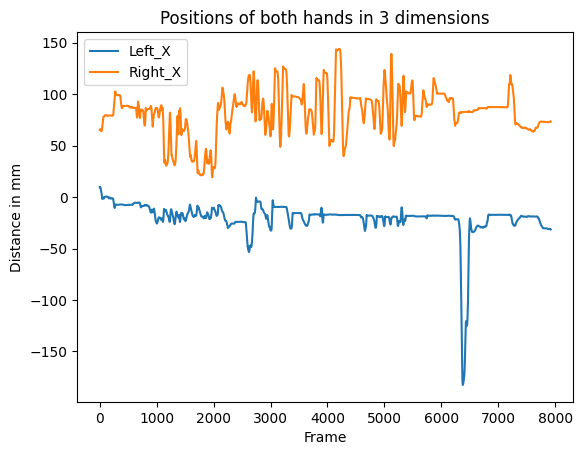

In [52]:
for col in ["Left_X", "Right_X"]: 
    plt.plot(P3_hands_pos.index, P3_hands_pos[col], label=f"{col}")
    plt.title('Positions of both hands in 3 dimensions')
    plt.xlabel('Frame')
    plt.ylabel('Distance in mm')
    plt.legend()

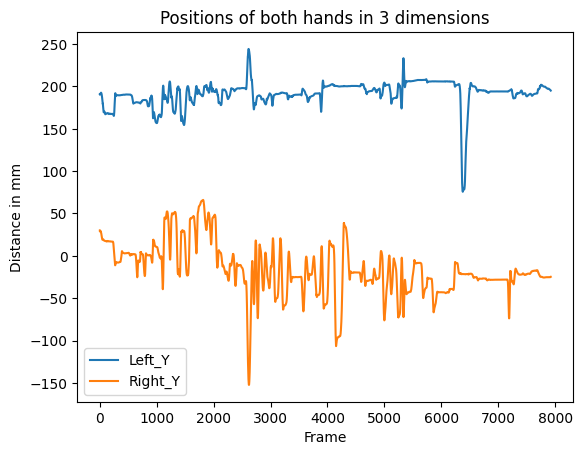

In [53]:
for col in ["Left_Y", "Right_Y"]: 
    plt.plot(P3_hands_pos.index, P3_hands_pos[col], label=f"{col}")
    plt.title('Positions of both hands in 3 dimensions')
    plt.xlabel('Frame')
    plt.ylabel('Distance in mm')
    plt.legend()

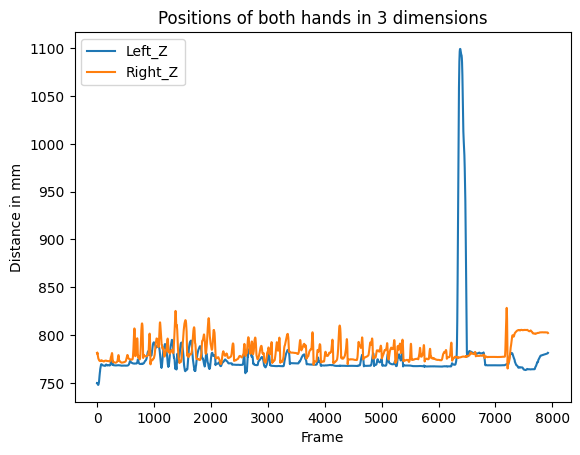

In [54]:
for col in ["Left_Z","Right_Z"]: 
    plt.plot(P3_hands_pos.index, P3_hands_pos[col], label=f"{col}")
    plt.title('Positions of both hands in 3 dimensions')
    plt.xlabel('Frame')
    plt.ylabel('Distance in mm')
    plt.legend()

# P4: Hand Analyse

In [55]:
P4_hands_dist = pd.read_table("C:/Users/sarah/Desktop/W2023 MoCap Data/Motioncapture_tsv_files/P4_dist_traveled/conv_P4&3_e_P4_hands_Distance.tsv", delimiter="\t", header = 0)
P4_hands_dir_dist = pd.read_table("C:/Users/sarah/Desktop/W2023 MoCap Data/Motioncapture_tsv_files/P4_dist_traveled/conv_P4&3_e_P4_hands_dir_Distance.tsv", delimiter="\t", header = 0)
P4_hands_dir_dist.rename(columns={'P4_hands_dir_Distance_X':'x-direction', 'P4_hands_dir_Distance_Y':'y-direction', 'P4_hands_dir_Distance_Z':'z-direction'}, inplace=True)
P4_hands_pos = pd.read_table("C:/Users/sarah/Desktop/W2023 MoCap Data/Motioncapture_tsv_files/P4_dist_traveled/conv_P4&3_e_P4_hands_pos.tsv", delimiter="\t", header = 0)
P4_hands_pos.rename(columns={"P4_hand_lP4_hands_pos_X":"Left_X", "P4_hand_lP4_hands_pos_Y":"Left_Y", "P4_hand_lP4_hands_pos_Z":"Left_Z", "P4_hand_rP4_hands_pos_X":"Right_X", "P4_hand_rP4_hands_pos_Y":"Right_Y", "P4_hand_rP4_hands_pos_Z":"Right_Z"}, inplace=True)

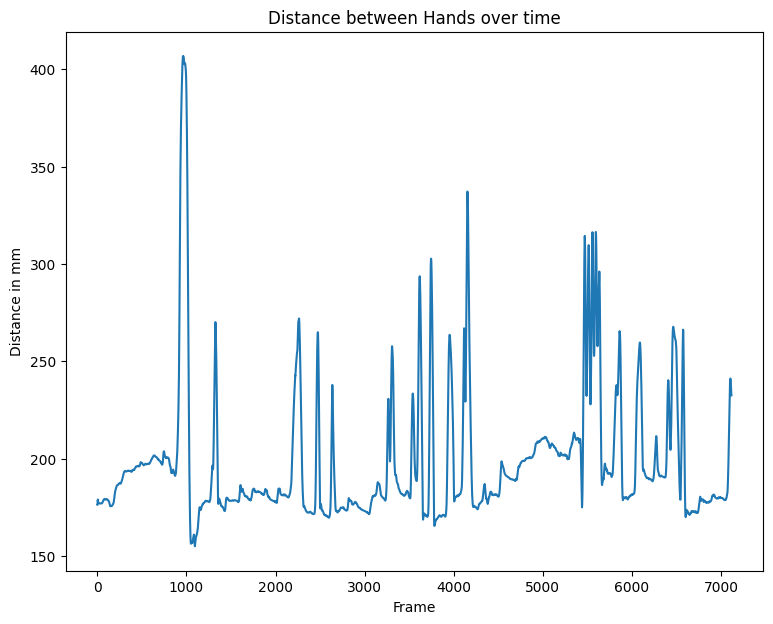

In [56]:
plt.figure(figsize = (9, 7))
plt.title('Distance between Hands over time')
plt.xlabel('Frame')
plt.ylabel('Distance in mm')
#plt.axhline(y = 225, color = 'r', linestyle = '-')
plt.plot(P4_hands_dist)

In [57]:
P4_mode = sum((P4_hands_dist.mode(numeric_only=True)).values.tolist(), [])
P4_mean = [np.mean(P4_hands_dist).tolist()]
P4_max = [np.max(P4_hands_dist).tolist()]
P4_min = [np.min(P4_hands_dist).tolist()]
P4_median = [np.median(P4_hands_dist).tolist()]
P4_harmonic_mean = (scipy.stats.hmean(P4_hands_dist)).tolist()
print(P4_mode, P4_mean, P4_max, P4_min)

[181.104] [198.30472586764088] [406.69] [155.095]


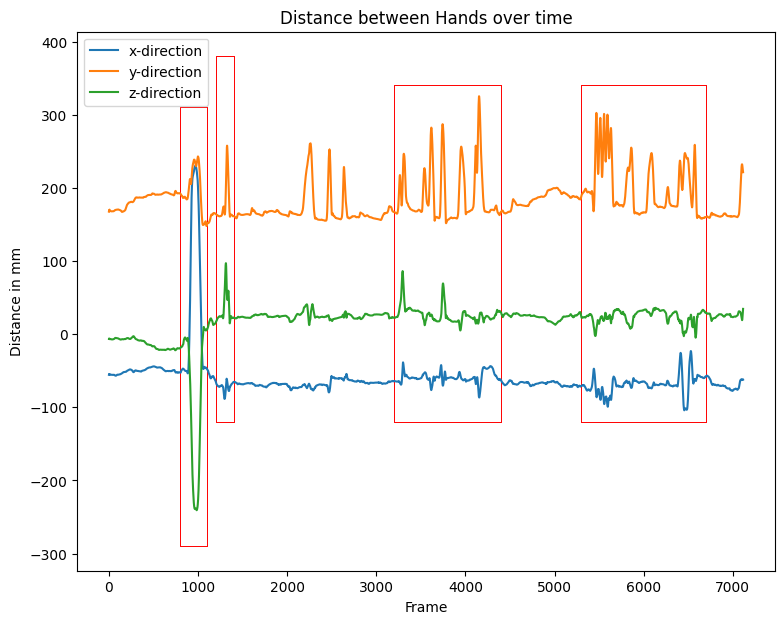

In [58]:
plt.figure(figsize = (9, 7))
for col in ["x-direction", "y-direction","z-direction"]: 
    plt.plot(P4_hands_dir_dist.index, P4_hands_dir_dist[col], label=f"{col}")
    plt.title('Distance between Hands over time')
    plt.xlabel('Frame')
    plt.ylabel('Distance in mm')
    plt.legend()
    plt.gca().add_patch(Rectangle((800, -290), 300, 600,
             edgecolor = 'red',
             fill=False, 
             lw = 0.5))
    plt.gca().add_patch(Rectangle((1200, -120), 200, 500,
             edgecolor = 'red',
             fill=False, 
             lw = 0.5))
    plt.gca().add_patch(Rectangle((3200, -120), 1200, 460,
             edgecolor = 'red',
             fill=False, 
             lw = 0.5))
    plt.gca().add_patch(Rectangle((5300, -120), 1400, 460,
             edgecolor = 'red',
             fill=False, 
             lw = 0.5))
    #plt.gca().add_patch(Rectangle((7100, -200), 600, 500,
             #edgecolor = 'red',
             #fill=False, 
             #lw = 0.5))
    plt.savefig('P4_hands_movement')

Patterns:
1. z goes way down, x goes way up, y a little up as well -> RH geht zum Kinn (nach innen also), wieder abgelegt
2. z & y go up, x goes synchronous down, then up -> LH wischt leicht nach außen (y) und oben 
3. all three go up, then y up, x&z down, then all up, then y up and x&z down ... -> 1. Anstieg: LH schwenkt leicht nach außen & oben, ab 3500 schwenken beide Hände synchron leicht nach außen und innen; ab 3700 schwenkt LH weit nach außen, auch bei 4000, ab 4100 schwenken wieder beide Hände leicht nach außen und innen
4. same game, but while x and y go down in same fashion, z goes up in same fashion (wie ein Flattern?), x&y go up, z goes down -> 5500 beide Hände wischen leicht nach außen und innen; ab 6300/400: beide Hände gehen erst nach links, dann nach rechts und wieder zurück

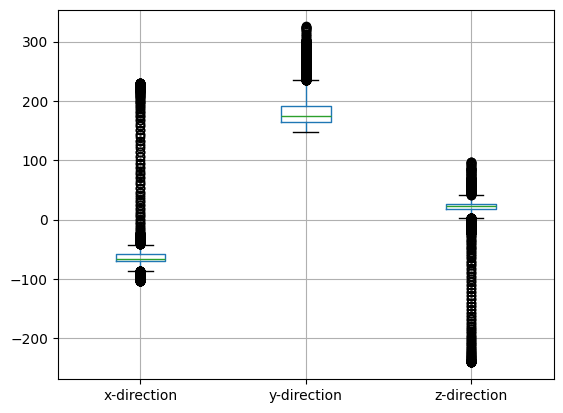

In [59]:
P4_dir_Boxplot = P4_hands_dir_dist.boxplot(column=["x-direction", "y-direction","z-direction"])

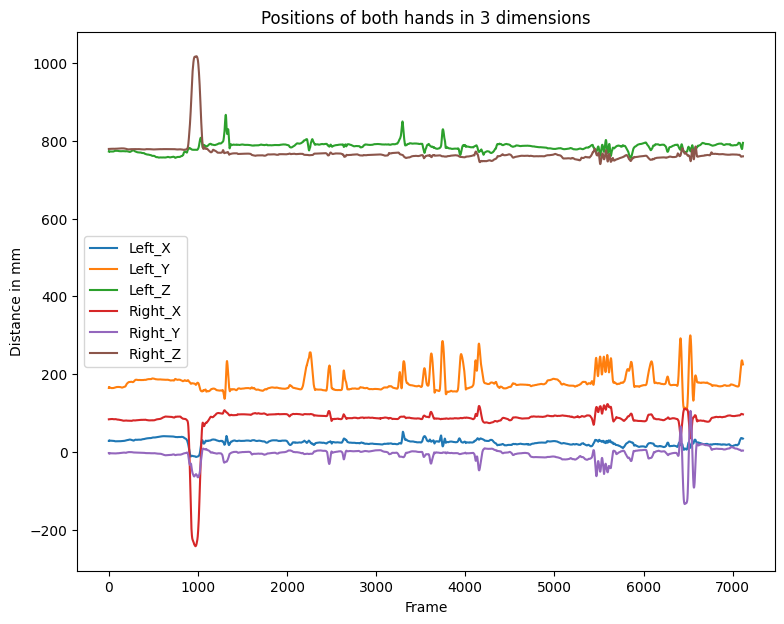

In [60]:
plt.figure(figsize = (9, 7))
for col in ["Left_X", "Left_Y", "Left_Z","Right_X","Right_Y","Right_Z"]: 
    plt.plot(P4_hands_pos.index, P4_hands_pos[col], label=f"{col}")
    plt.title('Positions of both hands in 3 dimensions')
    plt.xlabel('Frame')
    plt.ylabel('Distance in mm')
    plt.legend()
    plt.savefig('P4_hands_pos')

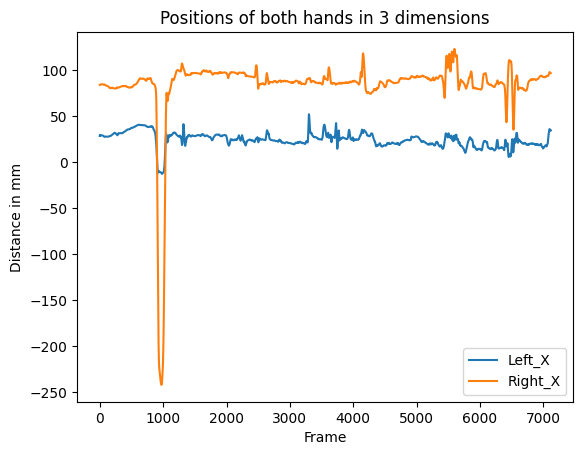

In [61]:
for col in ["Left_X","Right_X"]: 
    plt.plot(P4_hands_pos.index, P4_hands_pos[col], label=f"{col}")
    plt.title('Positions of both hands in 3 dimensions')
    plt.xlabel('Frame')
    plt.ylabel('Distance in mm')
    plt.legend()

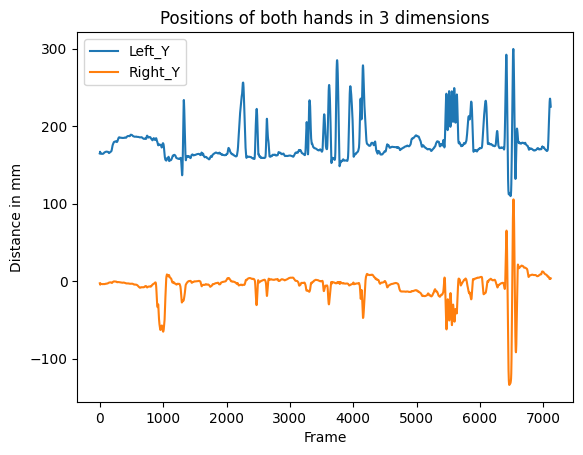

In [62]:
for col in ["Left_Y","Right_Y"]: 
    plt.plot(P4_hands_pos.index, P4_hands_pos[col], label=f"{col}")
    plt.title('Positions of both hands in 3 dimensions')
    plt.xlabel('Frame')
    plt.ylabel('Distance in mm')
    plt.legend()

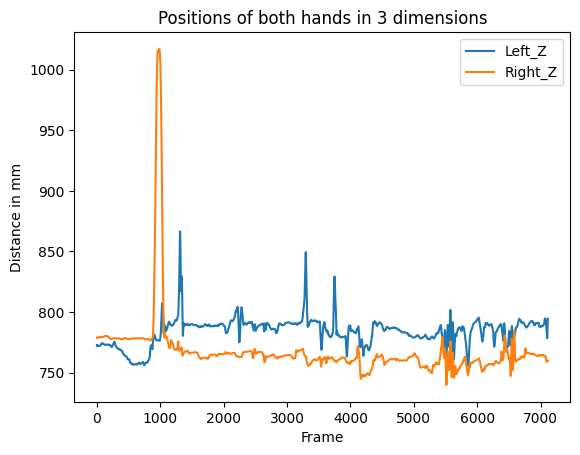

In [63]:
for col in ["Left_Z","Right_Z"]: 
    plt.plot(P4_hands_pos.index, P4_hands_pos[col], label=f"{col}")
    plt.title('Positions of both hands in 3 dimensions')
    plt.xlabel('Frame')
    plt.ylabel('Distance in mm')
    plt.legend()

# P5: Hand Analyse

In [64]:
P5_hands_dist = pd.read_table("C:/Users/sarah/Desktop/W2023 MoCap Data/Motioncapture_tsv_files/P5_dist_traveled/conv_P5&6_e_P5_hands_Distance.tsv", delimiter="\t", header = 0)
P5_hands_dir_dist = pd.read_table("C:/Users/sarah/Desktop/W2023 MoCap Data/Motioncapture_tsv_files/P5_dist_traveled/conv_P5&6_e_P5_hands_dir_Distance.tsv", delimiter="\t", header = 0)
P5_hands_dir_dist.rename(columns={'P5_hands_dir_Distance_X':'x-direction', 'P5_hands_dir_Distance_Y':'y-direction', 'P5_hands_dir_Distance_Z':'z-direction'}, inplace=True)
P5_hands_pos = pd.read_table("C:/Users/sarah/Desktop/W2023 MoCap Data/Motioncapture_tsv_files/P5_dist_traveled/conv_P5&6_e_P5_hands_pos.tsv", delimiter="\t", header = 0)
P5_hands_pos.rename(columns={"P5_hand_lP5_hands_pos_X":"Left_X", "P5_hand_lP5_hands_pos_Y":"Left_Y", "P5_hand_lP5_hands_pos_Z":"Left_Z", "P5_hand_rP5_hands_pos_X":"Right_X", "P5_hand_rP5_hands_pos_Y":"Right_Y", "P5_hand_rP5_hands_pos_Z":"Right_Z"}, inplace=True)

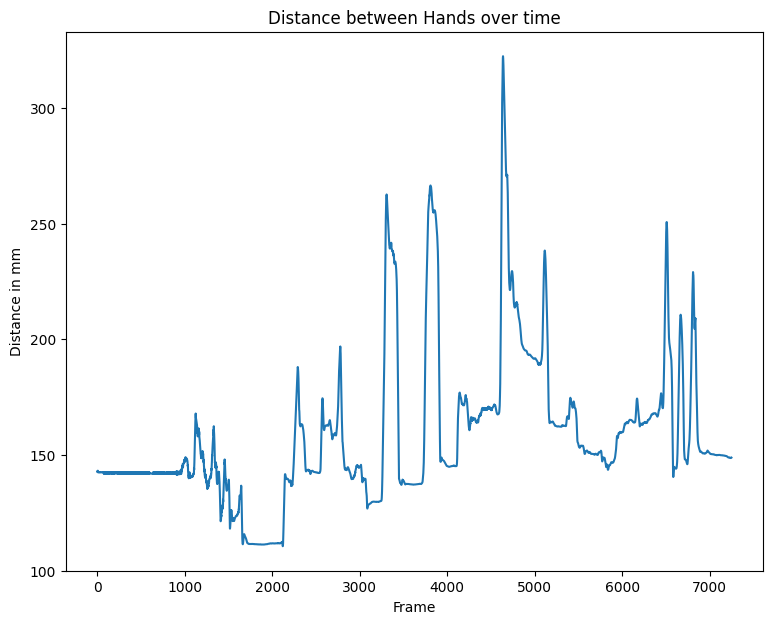

In [65]:
plt.figure(figsize = (9, 7))
plt.title('Distance between Hands over time')
plt.xlabel('Frame')
plt.ylabel('Distance in mm')
#plt.axhline(y = 225, color = 'r', linestyle = '-')
plt.plot(P5_hands_dist)

In [66]:
P5_mode = sum((P5_hands_dist.mode(numeric_only=True)).values.tolist(), [])
P5_mean = [np.mean(P5_hands_dist).tolist()]
P5_max = [np.max(P5_hands_dist).tolist()]
P5_min = [np.min(P5_hands_dist).tolist()]
P5_harmonic_mean = (scipy.stats.hmean(P5_hands_dist)).tolist()
P5_median = [np.median(P5_hands_dist).tolist()]
print(P5_mode, P5_mean, P5_max, P5_min)

[141.953] [158.71890978065937] [322.296] [110.554]


In [67]:
P5_harmonic_mean = (scipy.stats.hmean(P5_hands_dist)).tolist()

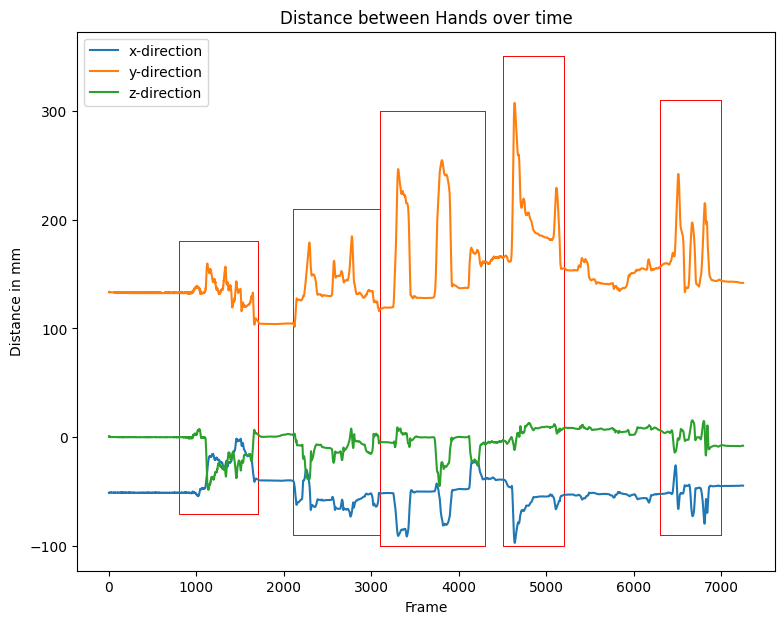

In [68]:
plt.figure(figsize = (9, 7))
for col in ["x-direction", "y-direction","z-direction"]: 
    plt.plot(P5_hands_dir_dist.index, P5_hands_dir_dist[col], label=f"{col}")
    plt.title('Distance between Hands over time')
    plt.xlabel('Frame')
    plt.ylabel('Distance in mm')
    plt.legend()
    plt.gca().add_patch(Rectangle((800, -70), 900, 250,
             edgecolor = 'red',
             fill=False, 
             lw = 0.5))
    plt.gca().add_patch(Rectangle((2100, -90), 1000, 300,
             edgecolor = 'red',
             fill=False, 
             lw = 0.5))
    plt.gca().add_patch(Rectangle((3100, -100), 1200, 400,
             edgecolor = 'red',
             fill=False, 
             lw = 0.5))
    plt.gca().add_patch(Rectangle((4500, -100), 700, 450,
             edgecolor = 'red',
             fill=False, 
             lw = 0.5))
    plt.gca().add_patch(Rectangle((6300, -90), 700, 400,
             edgecolor = 'red',
             fill=False, 
             lw = 0.5))
    plt.savefig('P5_hands_movement')

Patterns: 
1. y and z rise/sink opposite to each other, x also rises: erst: Hände liegen zsm am Tisch, dann geht LH nach vorne (+x), ab 1300/400 wischt RH leicht nach vorne & außen; ab 1400 wedeln beide Hände am Tisch in ggs. Richtungen; 1500: Hände machen kleine Kreisbewegungen, leicht versetzt
2. y and z rise/sink opposite to each other, x rises first synchronically, then also behaves opposite to y -> Hände gehen synchron leicht auseinander, 2300: RH wird kurz nach außen angehoben, wieder zurück, 2600: RH geht leicht hoch, runter, bei 2700/800 wischt nach außen
3. while y rises, x and z sink - but in the beginning, z rises as well -> Beide Hände synchron nach außen, wieder zusammen, wieder aueinander (leicht nach l verschoben), LH ist führend, ab 4100 wischen Hände beide nach links
4. similar - y rises, x & z sink -> ab 4600: Hände öffnen sich nach außen, wieder zsm
5. this time, y rises and z sinks in the beginning, x rises, and afterwards, they behave synchronically / as opposites -> 6500: Hände gehen synchron nach links, öffnen sich, gehen abwechselnd nach vorne; ab 6700: LH geht nach außen

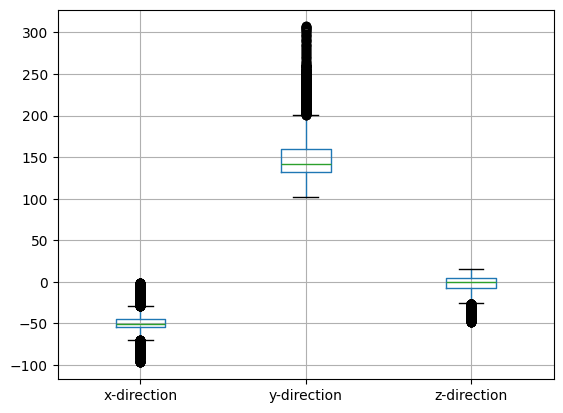

In [69]:
P5_dir_Boxplot = P5_hands_dir_dist.boxplot(column=["x-direction", "y-direction","z-direction"])

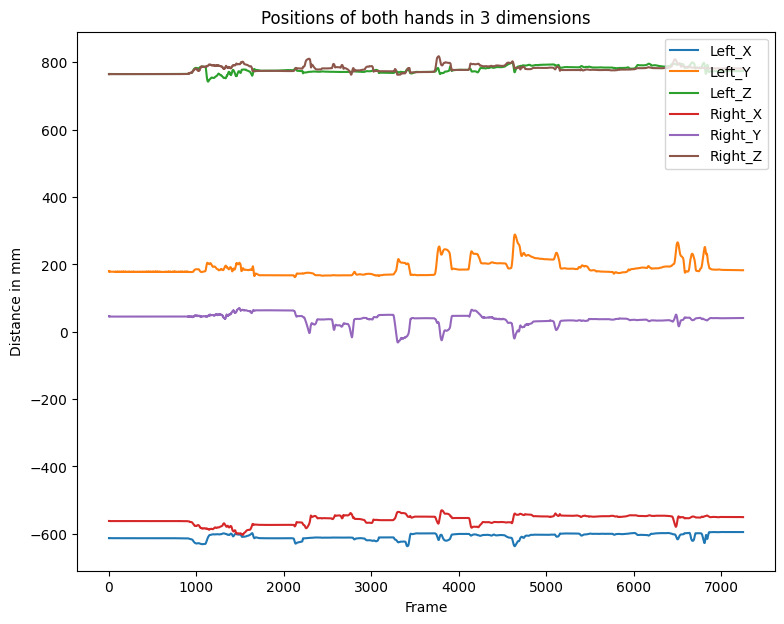

In [70]:
plt.figure(figsize = (9, 7))
for col in ["Left_X", "Left_Y", "Left_Z","Right_X","Right_Y","Right_Z"]: 
    plt.plot(P5_hands_pos.index, P5_hands_pos[col], label=f"{col}")
    plt.title('Positions of both hands in 3 dimensions')
    plt.xlabel('Frame')
    plt.ylabel('Distance in mm')
    plt.legend()
    plt.savefig('P5_hands_pos')

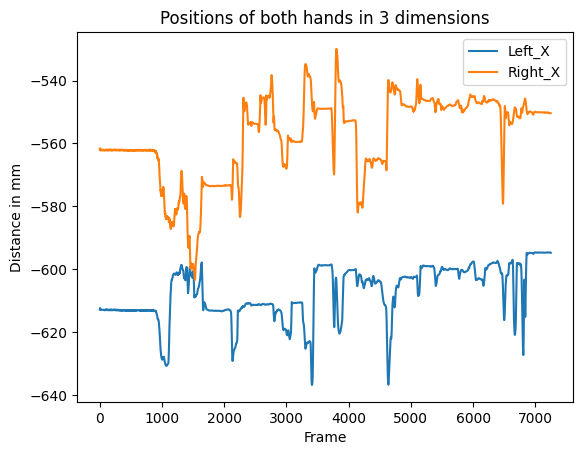

In [71]:
for col in ["Left_X","Right_X"]: 
    plt.plot(P5_hands_pos.index, P5_hands_pos[col], label=f"{col}")
    plt.title('Positions of both hands in 3 dimensions')
    plt.xlabel('Frame')
    plt.ylabel('Distance in mm')
    plt.legend()

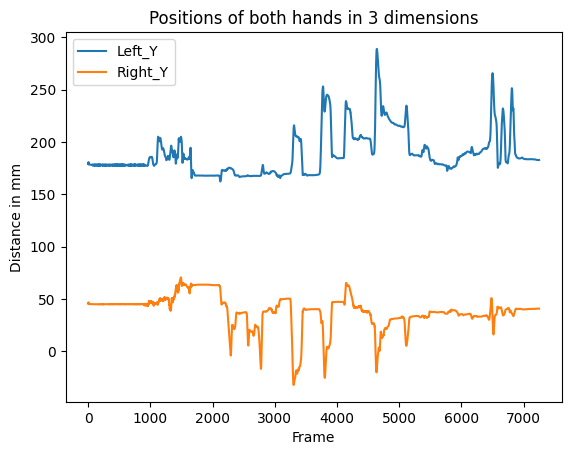

In [72]:
for col in ["Left_Y","Right_Y"]: 
    plt.plot(P5_hands_pos.index, P5_hands_pos[col], label=f"{col}")
    plt.title('Positions of both hands in 3 dimensions')
    plt.xlabel('Frame')
    plt.ylabel('Distance in mm')
    plt.legend()

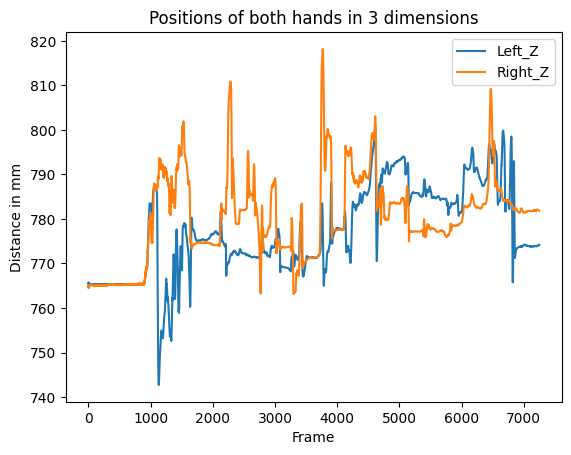

In [73]:
for col in ["Left_Z","Right_Z"]: 
    plt.plot(P5_hands_pos.index, P5_hands_pos[col], label=f"{col}")
    plt.title('Positions of both hands in 3 dimensions')
    plt.xlabel('Frame')
    plt.ylabel('Distance in mm')
    plt.legend()

In [74]:
P1_values = [P1_mean, P1_harmonic_mean, P1_median, P1_mode, P1_max, P1_min]
P2_values = [P2_mean, P2_harmonic_mean, P2_median,P2_mode, P2_max, P2_min]
P3_values = [P3_mean, P3_harmonic_mean, P3_median,P3_mode, P3_max, P3_min]
P4_values = [P4_mean, P4_harmonic_mean, P4_median,P4_mode, P4_max, P4_min]
P5_values = [P5_mean, P5_harmonic_mean, P5_median,P5_mode, P5_max, P5_min]
P6_values = [P6_mean, P6_harmonic_mean, P6_median,P6_mode, P6_max, P6_min]

In [75]:
P1_row = [x for xs in P1_values for x in xs]
P2_row = [x for xs in P2_values for x in xs]
P3_row = [x for xs in P3_values for x in xs]
P4_row = [x for xs in P4_values for x in xs]
P5_row = [x for xs in P5_values for x in xs]
P6_row = [x for xs in P6_values for x in xs]

In [76]:
distances_df = pd.DataFrame(list(zip(P1_row, P2_row, P3_row, P4_row, P5_row, P6_row)),columns=["1", "2", "3", "4", "5", "6"])

In [77]:
distances_df = distances_df.T

In [78]:
distances_df.columns=["mean", "harmonic_mean","median", "mode","max", "min"]

In [79]:
print(distances_df)

         mean  harmonic_mean    median     mode      max      min
1  245.382043     214.559900  225.1630  137.687  491.265   95.270
2  176.235795     160.544070  169.8070  195.605  677.796   76.605
3  235.116254     225.990590  239.0555  245.731  431.667  129.773
4  198.304726     193.877663  186.6780  181.104  406.690  155.095
5  158.718910     153.339132  149.8890  141.953  322.296  110.554
6  192.580689     180.259436  178.6895  152.761  397.910  122.083


In [80]:
def compute_IQR(data):
    Q1 = np.quantile(data, 0.25)
    Q3 = np.quantile(data, 0.75)
    IQR = Q3-Q1
    return IQR

In [81]:
P1_iqr = compute_IQR(P1_hands_dist)
P2_iqr = compute_IQR(P2_hands_dist)
P3_iqr = compute_IQR(P3_hands_dist)
P4_iqr = compute_IQR(P4_hands_dist)
P5_iqr = compute_IQR(P5_hands_dist)
P6_iqr = compute_IQR(P6_hands_dist)

In [82]:
new_col = [P1_iqr, P2_iqr, P3_iqr, P4_iqr, P5_iqr, P6_iqr]

In [83]:
distances_df["IQR"]=new_col

In [84]:
print(distances_df)

         mean  harmonic_mean    median     mode      max      min        IQR
1  245.382043     214.559900  225.1630  137.687  491.265   95.270  134.08925
2  176.235795     160.544070  169.8070  195.605  677.796   76.605   61.41900
3  235.116254     225.990590  239.0555  245.731  431.667  129.773   44.20150
4  198.304726     193.877663  186.6780  181.104  406.690  155.095   23.49900
5  158.718910     153.339132  149.8890  141.953  322.296  110.554   25.47300
6  192.580689     180.259436  178.6895  152.761  397.910  122.083   47.93400


In [85]:
distances_df.to_excel("Hands_comparison.xlsx")  

Creating a boxplot showing the distance between hands for all participants in one plot: 

In [86]:
boxplot_df = pd.concat([P1_hands_dist, P2_hands_dist, P3_hands_dist, P4_hands_dist, P5_hands_dist, P6_hands_dist], axis = 1)

In [87]:
my_order = boxplot_df.median().sort_values()

In [88]:
boxplot_df = boxplot_df[my_order.index]

In [89]:
boxplot_df = boxplot_df.dropna()

In [90]:
boxplot_df

,P5_hands_Distance,P2_hands_Distance,P6_hands_Distance,P4_hands_Distance,P1_hands_Distance,P3_hands_Distance
0,142.766,158.738,172.200,176.435,225.556,173.234
1,142.779,159.012,171.783,176.373,225.535,173.281
2,142.782,158.914,171.508,176.313,225.512,173.332
3,142.780,155.753,170.470,178.303,225.526,173.396
4,142.773,154.747,170.129,178.252,225.516,173.486
...,...,...,...,...,...,...
7112,149.977,187.523,245.873,235.460,173.967,245.601
7113,149.981,187.456,245.738,234.288,173.925,245.620
7114,149.978,187.400,245.635,233.427,173.939,245.617
7115,149.993,187.366,245.391,232.778,174.108,245.633


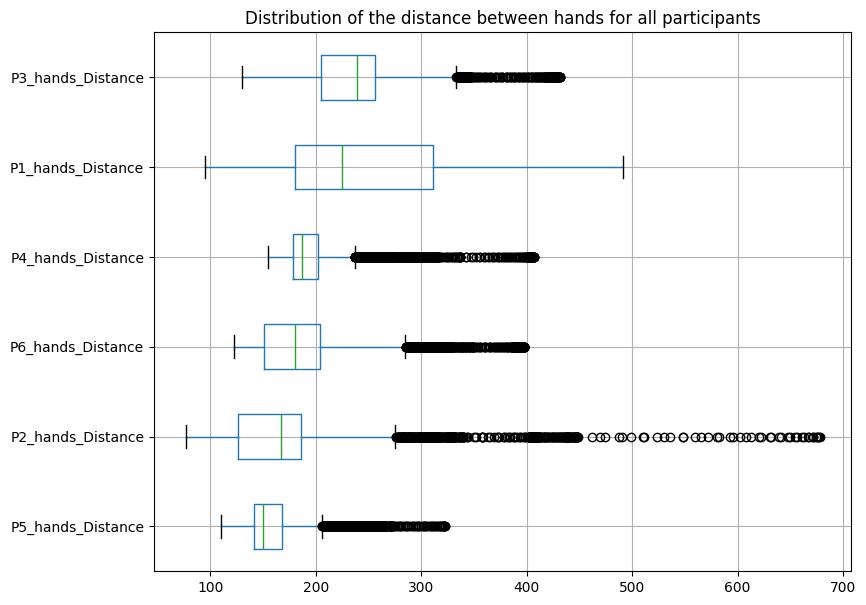

In [91]:
plt.figure(figsize = (9, 7))
plt.title("Distribution of the distance between hands for all participants")
boxplot = boxplot_df.boxplot(vert = False, manage_ticks = True)
plt.savefig('Handsdist_boxplot')

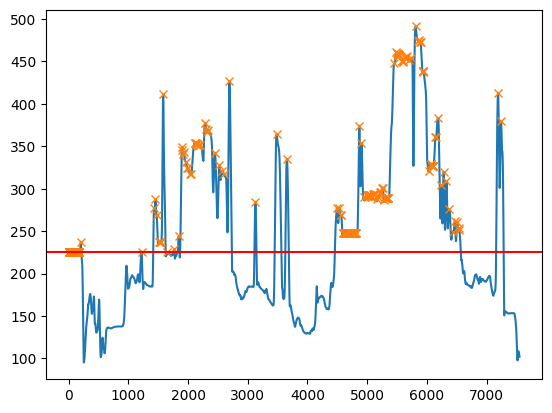

<Figure size 640x480 with 0 Axes>

In [92]:
import numpy as np 
from scipy.signal import find_peaks
P1_array = P1_hands_dist['P1_hands_Distance']

peaks, _ = find_peaks(P1_array, height=225.1630) #the median of P1_hands_dist!
plt.plot(P1_array)
plt.plot(peaks, P1_array[peaks], "x")
plt.axhline(y = 225, color = 'r', linestyle = '-')
plt.show()
plt.savefig('P1_peakfinder_hands_dist')

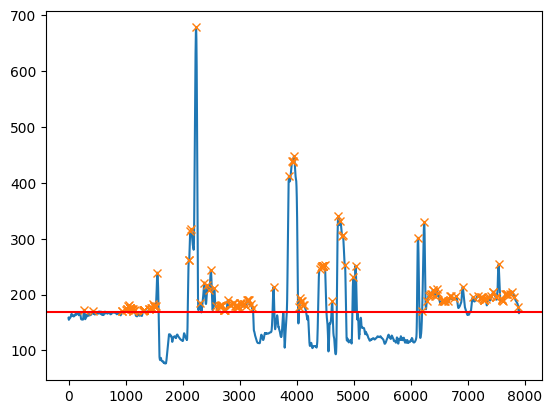

<Figure size 640x480 with 0 Axes>

In [93]:
P2_array = P2_hands_dist['P2_hands_Distance']

peaks, _ = find_peaks(P2_array, height=169.8070) #the median of P1_hands_dist!
plt.plot(P2_array)
plt.plot(peaks, P2_array[peaks], "x")
plt.axhline(y = 169, color = 'r', linestyle = '-')
plt.show()
plt.savefig('P2_peakfinder_hands_dist')

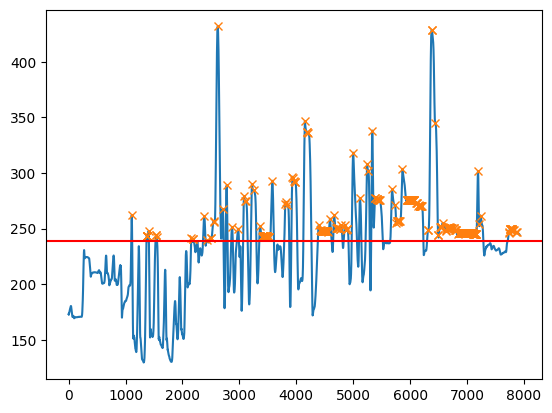

<Figure size 640x480 with 0 Axes>

In [94]:
P3_array = P3_hands_dist['P3_hands_Distance']

peaks, _ = find_peaks(P3_array, height=239.0555) #the median of P1_hands_dist!
plt.plot(P3_array)
plt.plot(peaks, P3_array[peaks], "x")
plt.axhline(y = 239, color = 'r', linestyle = '-')
plt.show()
plt.savefig('P3_peakfinder_hands_dist')

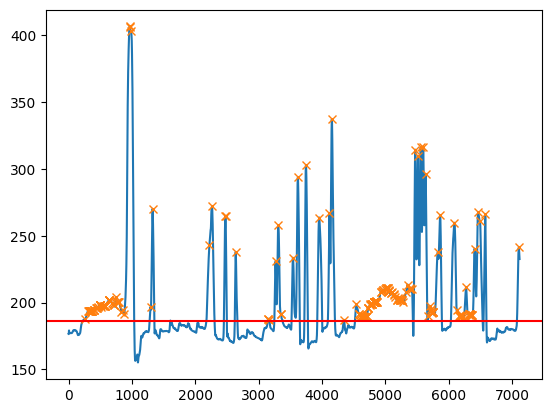

<Figure size 640x480 with 0 Axes>

In [95]:
P4_array = P4_hands_dist['P4_hands_Distance']

peaks, _ = find_peaks(P4_array, height=186.6780) #the median of P1_hands_dist!
plt.plot(P4_array)
plt.plot(peaks, P4_array[peaks], "x")
plt.axhline(y = 186, color = 'r', linestyle = '-')
plt.show()
plt.savefig('P4_peakfinder_hands_dist')

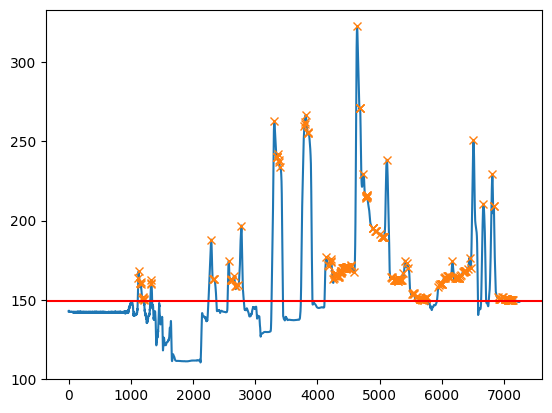

<Figure size 640x480 with 0 Axes>

In [96]:
P5_array = P5_hands_dist['P5_hands_Distance']

peaks, _ = find_peaks(P5_array, height=149.8890) #the median of P1_hands_dist!
plt.plot(P5_array)
plt.plot(peaks, P5_array[peaks], "x")
plt.axhline(y = 149, color = 'r', linestyle = '-')
plt.show()
plt.savefig('P5_peakfinder_hands_dist')

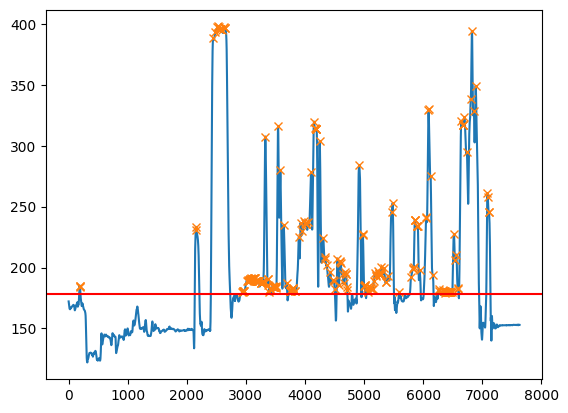

<Figure size 640x480 with 0 Axes>

In [97]:
P6_array = P6_hands_dist['P6_hands_Distance']

peaks, _ = find_peaks(P6_array, height=178.6895) #the median of P1_hands_dist!
plt.plot(P6_array)
plt.plot(peaks, P6_array[peaks], "x")
plt.axhline(y = 178, color = 'r', linestyle = '-')
plt.show()
plt.savefig('P6_peakfinder_hands_dist')

In [98]:
import numpy as np 
from scipy.signal import find_peaks

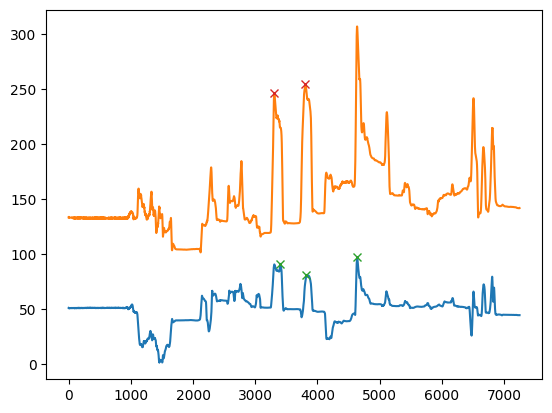

<Figure size 640x480 with 0 Axes>

In [99]:
P5_dir_x = P5_hands_dir_dist["x-direction"]
P5_dir_y = P5_hands_dir_dist["y-direction"]


plt.plot(-P5_dir_x)
plt.plot(P5_dir_y)
peaks_x, _ = find_peaks(-P5_dir_x, prominence=30, width=100) #since we cannot detect the negative peaks, we could use -data? 
peaks_y, _ = find_peaks(P5_dir_y, prominence=100, width =100)

plt.plot(peaks_x, -P5_dir_x[peaks_x], "x")
plt.plot(peaks_y, P5_dir_y[peaks_y], "x")
#plt.axhline(y = 178, color = 'r', linestyle = '-')
plt.show()
plt.savefig('P5_peakfinder_both_hands_dist')